In [305]:
#TOC model is Poisson
#NH3 model is normal distributed with claimed mean 0.090000 and known standard deviation 0.01
#DO model is normal distributed with claimed mean 9.000000
#SO4 model is uniform
#Pb model is uniform


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy.stats import uniform
from scipy.stats import kstest, norm
from scipy.stats import anderson
from numpy import random
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import poisson
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
df = pd.read_csv("DATA/WaterContaminantsDAta.txt", sep=",")




In [306]:
def is_uniform_distribution(dataframe, column_name, confidence_level=0.9):
    column_data = dataframe[column_name]
    min_value = column_data.min()
    max_value = column_data.max()

    # Calculate the number of bins based on the square root of the data size
    n = len(column_data)
    k = int(np.sqrt(n))

    # Calculate the observed frequencies in each bin
    observed, _ = np.histogram(column_data, bins=k)

    # Calculate the expected frequencies assuming a uniform distribution
    expected = np.full_like(observed, fill_value=n / k)

    # Perform the chi-square test
    chi2_statistic, p_value, _, _ = chi2_contingency([observed, expected])

    # Calculate the critical value based on the confidence level
    alpha = 1 - confidence_level
    critical_value = chi2.ppf(1 - alpha, df=k - 1)

    # Check if the chi-square statistic is less than the critical value
    if chi2_statistic < critical_value:
        print(
            f"The column '{column_name}' follows a uniform distribution within a {confidence_level * 100}% confidence interval.")
    else:
        print(
            f"The column '{column_name}' does not follow a uniform distribution within a {confidence_level * 100}% confidence interval.")

    print(f"Chi-square statistic: {chi2_statistic}")
    print(f"Critical value: {critical_value}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")


In [307]:
def check_poisson_distribution(dataframe, column_name):
    # Extract the column data as a NumPy array
    data = dataframe[column_name].values

    # Calculate the mean and variance of the data
    data_mean = np.mean(data)
    data_var = np.var(data)

    # Calculate the confidence interval for the Poisson distribution
    confidence_interval = poisson.interval(0.99, data_mean)

    # Check if the data falls within the confidence interval
    if data_var >= confidence_interval[0] and data_var <= confidence_interval[1]:
        print(
            f"The column '{column_name}' follows a Poisson distribution within the 99% confidence interval.")
    else:
        print(
            f"The column '{column_name}' does not follow a Poisson distribution within the 99% confidence interval.")


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\2480697297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_TOC, hist=True, label='TOC')
C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\2480697297.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=6, siz

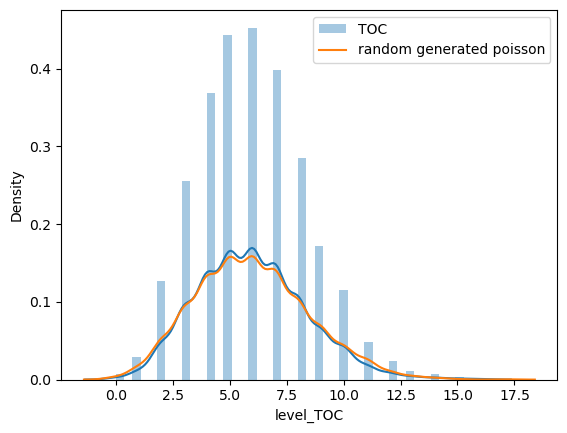

The column 'level_TOC' follows a Poisson distribution within the 99% confidence interval.


In [308]:


#TOC
sns.distplot(df.level_TOC, hist=True, label='TOC')
sns.distplot(random.poisson(lam=6, size=4400), hist=False, label='random generated poisson')
plt.legend()
plt.show()

# for this to be poisson distribution, mean needs to equal vairence

check_poisson_distribution(df, 'level_TOC')


In [309]:

def check_normal_distribution(dataframe, column_name, alpha=0.1):
    # Extract the column data as a NumPy array
    data = dataframe[column_name].values

    # Calculate the sample mean and standard deviation
    data_mean = np.mean(data)
    data_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation

    # Perform the Kolmogorov-Smirnov test
    _, p_value = kstest(data, 'norm', args=(data_mean, data_std))
    print(p_value)
    # Check if the p-value is greater than the significance level (alpha)
    if p_value > alpha:
        print(
            f"The column '{column_name}' follows a normal distribution within the 90% confidence interval.")
    else:
        print(
            f"The column '{column_name}' does not follow a normal distribution within the 90% confidence interval.")


0.676531314095915
The column 'level_NH3' follows a normal distribution within the 90% confidence interval.


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\2730143090.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_NH3, hist=True, label='DO')


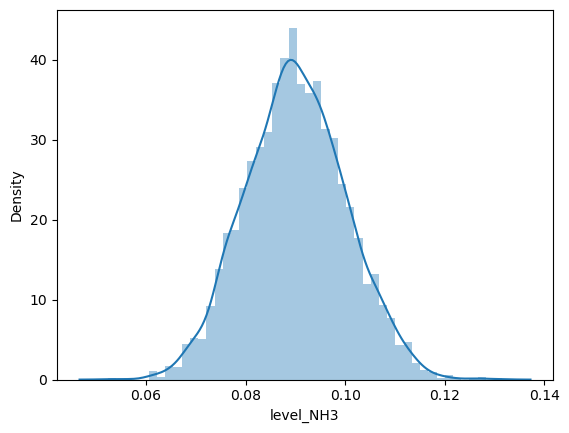

In [310]:
# NH3


sns.distplot(df.level_NH3, hist=True, label='DO')

check_normal_distribution(df, 'level_NH3', alpha=0.1)


In [311]:
#NH3 model is normal distributed with claimed mean 0.090000 and known standard deviation 0.01
c_a = 3.3 # value from the table
std_a = 0.01 # exercise description
n_a = len(df.level_NH3)
k_a = c_a * std_a/np.sqrt(n_a)
kp_a = np.mean(df.level_NH3) + k_a
km_a = np.mean(df.level_NH3) - k_a
print("interval:",km_a,kp_a)
#Fits with 99.9% and it is normal distribution via KS test with 95%

interval: 0.08961053911189125 0.09060745427163604


0.5973649009302067
The column 'level_DO' follows a normal distribution within the 90% confidence interval.


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\1813680687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_DO, hist=True, label='DO')


interval: 8.965756993195802 9.066935873333973


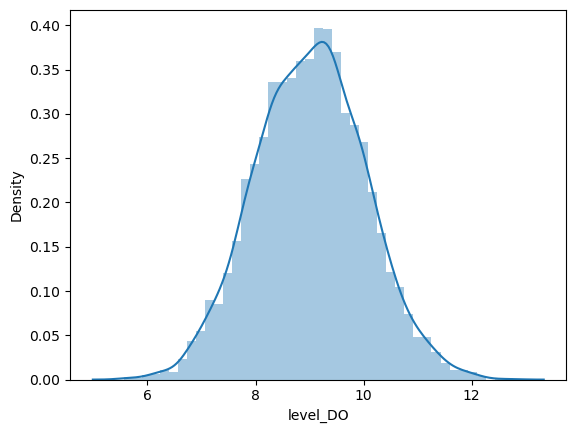

In [312]:
#DO model is normal distributed with claimed mean 9.000000
sns.distplot(df.level_DO, hist=True, label='DO')

check_normal_distribution(df, 'level_DO', alpha=0.1)


mean_b = np.mean(df.level_DO)
#print("mean:", mean_b)

c_b = 3.3
s_b = np.std(df.level_DO)
k_b = c_b*s_b/np.sqrt(len(df.level_DO))
kp_b = mean_b + k_b
km_b = mean_b - k_b
print("interval:", km_b, kp_b)

#Fits with 99.9% and it is normal distribution via KS test with 95%


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\2355309699.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_SO4, hist=True, label='SO4')


The column 'level_SO4' does not follow a uniform distribution within a 90.0% confidence interval.
Chi-square statistic: 4476.897615035741
Critical value: 79.97300265487546
Minimum value: 0.01220826
Maximum value: 515.9413


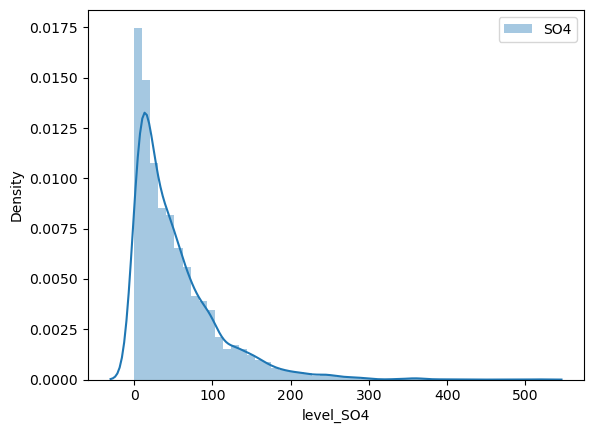

In [313]:
#SO4 model is uniform
sns.distplot(df.level_SO4, hist=True, label='SO4')
is_uniform_distribution(
    df, 'level_SO4', confidence_level=0.9)

plt.legend()
plt.show()


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\3568739676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_Pb, hist=True, label='Pb')


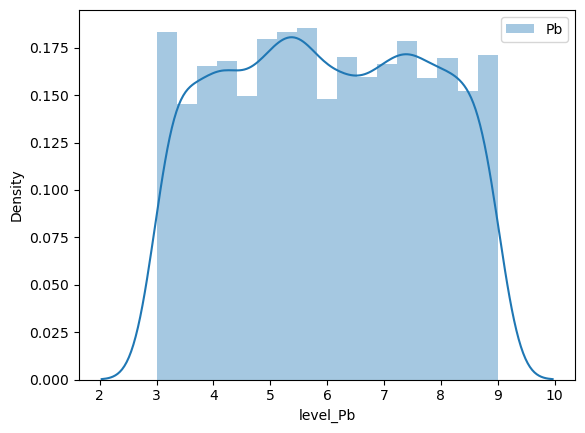

The column 'level_Pb' follows a uniform distribution within a 90.0% confidence interval.
Chi-square statistic: 41.965189021975945
Critical value: 79.97300265487546
Minimum value: 3.001771
Maximum value: 8.998878


In [314]:
#Pb model is uniform
sns.distplot(df.level_Pb, hist=True, label='Pb')

plt.legend()
plt.show()

#is_uniform_distribution(df, 'level_Pb')
#is_uniform_distribution(df, 'level_SO4')
is_uniform_distribution(
    df, 'level_Pb', confidence_level=0.9)
